# $$ Assignment-6 $$
# $$Task-1$$

This assignment is for visualization using matplotlib:

data to use:

url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)
Charts to plot:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [2]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
female_count = titanic.sex == 'female'

#### 1. Create a pie chart presenting the male/female proportion

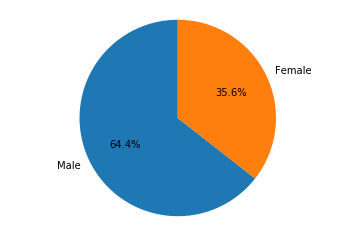

In [4]:
male = len(titanic[~female_count])
female = len(titanic[female_count])
fig1, ax1 = plt.subplots()
ax1.pie([male, female], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

Text(0,0.5,'Fare Paid')

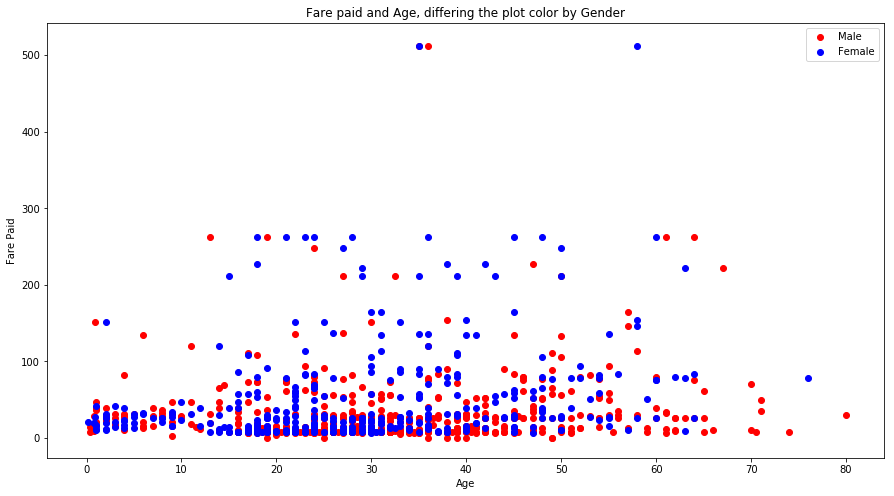

In [5]:
subset_a = titanic[female_count]
subset_b = titanic[~female_count]
plt.figure(figsize=(15, 8))
plt.scatter(subset_b.age, subset_b.fare, c='r', label='Male')
plt.scatter(subset_a.age,subset_a.fare, c='b', label='Female')
plt.legend()
plt.title("Fare paid and Age, differing the plot color by Gender")
plt.xlabel("Age")
plt.ylabel("Fare Paid")

# $$Task-2$$

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],

'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],

'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],

'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [6]:
import pandas as pd
import numpy as np
flights = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', ' (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
flights

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],(12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


#### 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).


In [7]:
print("Missing values in FlightNumber column is incremented by 10 with starting value as 10045\n",'-'*87, sep='')
def create_list(x,y):
    for i in range(1,y):
        flights.loc[i,'FlightNumber'] = flights.loc[i-1,'FlightNumber']+10        
flights['FlightNumber'].fillna(0, inplace=True)
flights['FlightNumber'] = flights['FlightNumber'].astype(int)
First_Flightnumber = flights.loc[0,'FlightNumber']
create_list(First_Flightnumber,len(flights.FlightNumber))
flights

Missing values in FlightNumber column is incremented by 10 with starting value as 10045
---------------------------------------------------------------------------------------


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],(12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


#### 2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [8]:
print("Splitting From_To column \n",'-'*25, sep='')
def Fromsplitstring(str):
    return str.split('_')[0]
def Tosplitstring(str):
    return str.split('_')[1]
FromList = flights['From_To'].apply(Fromsplitstring)
ToList = flights['From_To'].apply(Tosplitstring)
temporary = pd.DataFrame()
temporary["From"] = FromList
temporary["To"] = ToList
temporary

Splitting From_To column 
-------------------------


,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


#### 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [9]:
print("Standardise the City Name\n",'-'*25, sep='')
temporary['From'] = list(map(lambda str : str.title(),temporary.From))
temporary['To'] = list(map(lambda str : str.title(),temporary.To))
temporary

Standardise the City Name
-------------------------


,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


#### 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [10]:
print("Replasing From_To Column With New Values \n",'-'*40, sep='')
flights.drop('From_To', axis=1, inplace=True)
flights = pd.concat([temporary, flights], axis=1)
flights

Replasing From_To Column With New Values 
----------------------------------------


,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],(12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


#### 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN. 

#### Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [11]:
print("Expanding the Delay Columns \n",'-'*28, sep='')

DelayList = list(map(lambda x : len(x),flights.RecentDelays))
max_columns = max(DelayList)
New_RecentDelays = []
Two_dim_RecentDelays = []
for outeritems in flights.RecentDelays:
    New_RecentDelays = outeritems
    count = len(outeritems)
    while(count<max_columns):
        New_RecentDelays.append(np.NaN)
        count +=1
    Two_dim_RecentDelays.append(New_RecentDelays)
Delays = pd.DataFrame(Two_dim_RecentDelays)
column_list = []
for count in range(1,max_columns+1):
    column_list.append('delay_'+str(count))
Delays.columns = column_list
flights.drop('RecentDelays', axis=1, inplace=True)
flights = pd.concat([flights, Delays], axis=1)
flights

Expanding the Delay Columns 
----------------------------


,From,To,FlightNumber,Airline,delay_1,delay_2,delay_3
0,London,Paris,10045,KLM(!),23.0,47.0,NaN
1,Madrid,Milan,10055,(12),NaN,NaN,NaN
2,London,Stockholm,10065,(British Airways. ),24.0,43.0,87.0
3,Budapest,Paris,10075,12. Air France,13.0,NaN,NaN
4,Brussels,London,10085,"""Swiss Air""",67.0,32.0,NaN
